In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
cancer = load_breast_cancer()

In [6]:
print('keys: %s' % cancer.keys())

keys: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [8]:
print('Shape: %s, %s' % cancer.data.shape)

Shape: 569, 30


In [9]:
print('Feature names: %s' % cancer.feature_names)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [13]:
print('Target names: %s' % cancer.target_names)

Target names: ['malignant' 'benign']


In [11]:
np.bincount(cancer.target)

array([212, 357])

In [14]:
print("Number of examples for the each class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}


In [22]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    random_state=66)

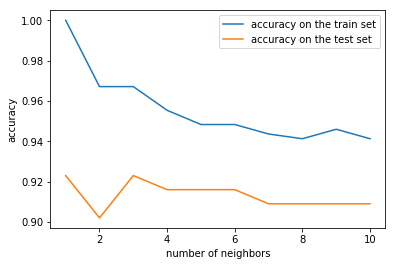

In [31]:
training_accuracy = list()
test_accuracy = list()

neighbors_parameters = range(1, 11)

for n_neighbors in neighbors_parameters:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_parameters, training_accuracy, label='accuracy on the train set')
plt.plot(neighbors_parameters, test_accuracy, label='accuracy on the test set')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.legend()